In [1]:
import numpy as np
import matplotlib.pyplot as plt

from temporal_difference import SARSA
from envs.gridworld import GridworldEnv
from utils.grid_visualization import visualize_value_function, visualize_policy

np.random.seed(0)

## `GridWorld` 초기화하기

가로로 `nx` 개, 세로로 `ny` 개의 칸을 가진 `GridworldEnv`를 만듭니다!

In [2]:
nx, ny = 4, 4
env = GridworldEnv([ny, nx])

## SARSA 에이전트 초기화하기

`SARSA`는 이전에 배웠던 TDAgent 를 상속받는 형태로 구현되었습니다. `SARSA`의 생성자는 다음과 같습니다.

```python
class SARSA(TDAgent):

    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 epsilon: float,
                 lr: float):
        super(SARSA, self).__init__(gamma=gamma,
                                    num_states=num_states,
                                    num_actions=num_actions,
                                    epsilon=epsilon,
                                    lr=lr,
                                    n_step=1)
```

각 인자의 의미는 다음과 같습니다.
1. `gamma` : 감가율
2. `num_states` : 상태공간의 크기 (서로 다른 상태의 갯수)
3. `num_actions` : 행동공간의 크기 (서로 다른 행동의 갯수)
4. `epsilon`: $\epsilon$-탐욕적 정책의 파라미터
5. `lr` : 학습률

In [3]:
sarsa_agent = SARSA(gamma=1.0,
                    lr=1e-1,
                    num_states=env.nS,
                    num_actions=env.nA,
                    epsilon=1.0)

## SARSA 업데이트

SARSA 업데이트는 다음의 의사코드와 같이 진행됩니다.

<img src="./images/sarsa.png" width="60%" height="100%" title="px(픽셀) 크기 설정" alt="sarsa_update"></img> 

기존의 `TDAgent` 의 업데이트와 차이점은 다음 상태에 대한 행동인 $a'$을 업데이트에 같이 사용한다는 것입니다. SARSA를 구현할 때 이 부분을 꼭 유의해주세요!

알고리즘 의사코드를 파이썬으로 구현하면 다음과 같습니다.

```python
def update_sample(self, state, action, reward, next_state, next_action, done):
    s, a, r, ns, na = state, action, reward, next_state, next_action

    # SARSA target
    td_target = r + self.gamma * self.q[ns, na] * (1 - done)
    self.q[s, a] += self.lr * (td_target - self.q[s, a])
```

In [4]:
num_eps = 10000
report_every = 1000
sarsa_qs = []
iter_idx = []
sarsa_rewards = []


for i in range(num_eps):
    
    reward_sum = 0
    env.reset()    
    while True:
        state = env.s
        action = sarsa_agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_action = sarsa_agent.get_action(next_state)
        
        sarsa_agent.update_sample(state=state,
                                  action=action,
                                  reward=reward,
                                  next_state=next_state,
                                  next_action=next_action,
                                  done=done)
        reward_sum += reward
        if done:
            break
    
    sarsa_rewards.append(reward_sum)
    
    if i % report_every == 0:
        print("Running {} th episode".format(i))
        print("Reward sum : {}".format(reward_sum))
        sarsa_qs.append(sarsa_agent.q.copy())
        iter_idx.append(i)

Running 0 th episode
Reward sum : -4.0
Running 1000 th episode
Reward sum : -40.0
Running 2000 th episode
Reward sum : -8.0
Running 3000 th episode
Reward sum : 0.0
Running 4000 th episode
Reward sum : -54.0
Running 5000 th episode
Reward sum : -16.0
Running 6000 th episode
Reward sum : -8.0
Running 7000 th episode
Reward sum : -27.0
Running 8000 th episode
Reward sum : -66.0
Running 9000 th episode
Reward sum : -86.0


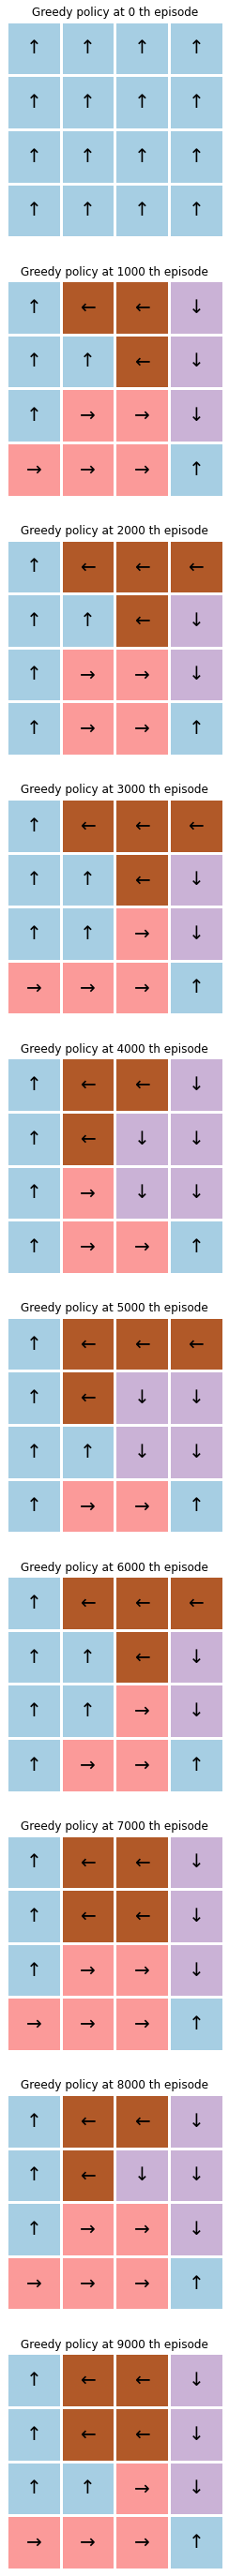

In [7]:
num_plots = len(sarsa_qs)
fig, ax = plt.subplots(num_plots, figsize=(num_plots*5*5, num_plots*5))
for i, (q, viz_i) in enumerate(zip(sarsa_qs, iter_idx)):
    visualize_policy(ax[i], q, env.shape[0], env.shape[1])
    _ = ax[i].set_title("Greedy policy at {} th episode".format(viz_i))